## Test
We used this script to evaluuate the potential of using the convex hull

In [1]:
import torch

In [2]:
# Import models

large = torch.load('models/large/pytorch_model.bin',map_location=torch.device('cpu'))
small = torch.load('models/small/pytorch_model.bin',map_location=torch.device('cpu'))

## Distance between large model weights and convex hull of small model

In [3]:
def min_matrix_distance_to_span(A, X1, X2, X3, num_samples=100):
    # Generate random convex weights as PyTorch tensors
    t = torch.rand(num_samples, 3)
    t = t / t.sum(dim=1, keepdim=True)  # Normalize weights to sum to 1
    
    
    X1 = (t[:, 0].unsqueeze(1)*X1.unsqueeze(1)).permute(0,2,1)
    X2 = (t[:, 1].unsqueeze(1)*X2.unsqueeze(1)).permute(0,2,1)
    X3 = (t[:, 2].unsqueeze(1)*X3.unsqueeze(1)).permute(0,2,1)
    
    # Compute convex combinations of matrices X1, X2, X3
    Y = X1 + X2 + X3
    
    # Calculate distances from A to each point in Y
    distances = torch.norm(A.unsqueeze(2) - Y, dim=(0,1), p=None)/torch.norm(A, p=None)  
    
    
    # Return the minimum distance
    min_distance = torch.min(distances)
    
    #We will return all of the points instead of just the min
    return distances  

X1 = small['bert.encoder.layer.0.intermediate.dense.weight']
X2 = small['bert.encoder.layer.1.intermediate.dense.weight']
X3 = small['bert.encoder.layer.2.intermediate.dense.weight']
A = large['bert.encoder.layer.5.intermediate.dense.weight']




In [4]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 300

# Compute minimum distances for each layer and collect the data
distances_by_layer = []
for i in range(6):  # Iterate over layers 0 to 5
    layer_key = f'bert.encoder.layer.{i}.intermediate.dense.weight'
    if layer_key in large:
        A = large[layer_key]
        min_distance = min_matrix_distance_to_span(A, X1, X2, X3, num_samples=num_samples)
        distances_by_layer.append(min_distance)


/var/folders/s8/q3wm18k16lb83pstlx63tv5c0000gn/T/ipykernel_21044/2000244875.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Blues')(np.linspace(0, 1, 6))  # Generate colors from a colormap


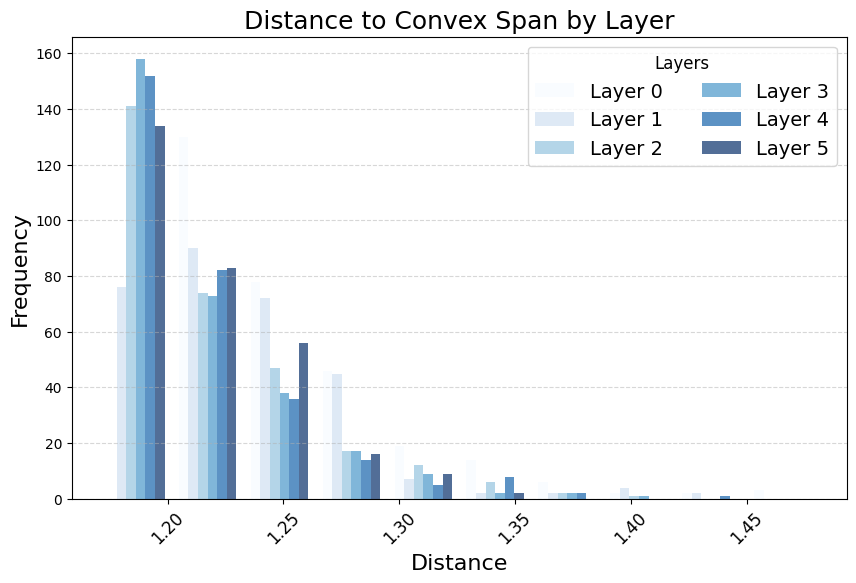

In [6]:

# Plotting the histogram with different colors for different layers
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('Blues')(np.linspace(0, 1, 6))  # Generate colors from a colormap
plt.hist(distances_by_layer, bins=10, alpha=0.7, color=colors[:len(distances_by_layer)])
plt.xlabel('Distance',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.title('Distance to Convex Span by Layer',fontsize=18)
plt.xticks(rotation=45,fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Create legend for each layer with two columns
legend_labels = [f'Layer {i}' for i in range(len(distances_by_layer))]
plt.legend(legend_labels, loc='upper right', fontsize=14, title='Layers', title_fontsize='large', ncol=2)  # Two columns in the legend


plt.show()

## Distance between large model weights and linear combination of small model

In [7]:
def min_matrix_distance_to_span(A, X1, X2, X3, num_samples=100):
    # Generate random  weights as PyTorch tensors between [-5,5]
    t = torch.rand(num_samples, 3)*10-5
    #t = t / t.sum(dim=1, keepdim=True)  # Normalize weights to sum to 1
    
    # Convert matrices to PyTorch tensors
    
    X1 = (t[:, 0].unsqueeze(1)*X1.unsqueeze(1)).permute(0,2,1)
    X2 = (t[:, 1].unsqueeze(1)*X2.unsqueeze(1)).permute(0,2,1)
    X3 = (t[:, 2].unsqueeze(1)*X3.unsqueeze(1)).permute(0,2,1)
    
    # Compute linear combinations of matrices X1, X2, X3
    Y = X1 + X2 + X3
    
    # Calculate distances from A to each point in Y
    distances = torch.norm(A.unsqueeze(2) - Y, dim=(0,1), p=None)/torch.norm(A, p=None)  
    
    
    # Return the minimum distance
    min_distance = torch.min(distances)
    
    #We will return all of the points instead of just the min
    return distances  # Convert to Python float

X1 = small['bert.encoder.layer.0.intermediate.dense.weight']
X2 = small['bert.encoder.layer.1.intermediate.dense.weight']
X3 = small['bert.encoder.layer.2.intermediate.dense.weight']
A = large['bert.encoder.layer.5.intermediate.dense.weight']


num_samples = 300

# Compute minimum distances for each layer and collect the data
distances_by_layer = []
for i in range(6):  # Iterate over layers 0 to 5
    layer_key = f'bert.encoder.layer.{i}.intermediate.dense.weight'
    if layer_key in large:
        A = large[layer_key]
        min_distance = min_matrix_distance_to_span(A, X1, X2, X3, num_samples=num_samples)
        distances_by_layer.append(min_distance)







/var/folders/s8/q3wm18k16lb83pstlx63tv5c0000gn/T/ipykernel_21044/2757826423.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Blues')(np.linspace(0, 1, 6))  # Generate colors from a colormap


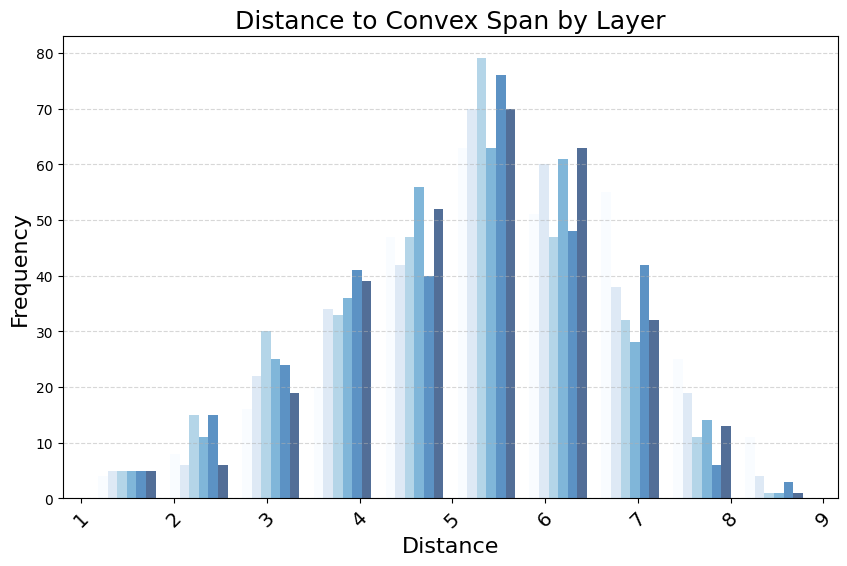

In [9]:
# Plotting the histogram with different colors for different layers
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('Blues')(np.linspace(0, 1, 6))  # Generate colors from a colormap
plt.hist(distances_by_layer, bins=10, alpha=0.7, color=colors[:len(distances_by_layer)])
plt.xlabel('Distance',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.title('Distance to Convex Span by Layer',fontsize=18)
plt.xticks(rotation=45,fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
#plt.legend([f'Layer {i}' for i in range(len(distances_by_layer))], loc='upper right',fontsize=12)
plt.show()
    

In [93]:
# def min_matrix_distance_to_span(A, X1, X2, X3, num_samples=100):
#     # Generate random weights for the diagonal of the matrix
#     weights_diag = torch.rand(num_samples, 3, X1.shape[1])  # Assuming X1, X2, X3 have the same number of rows
    
#     # Normalize the sum of the diagonal weights to ensure a valid convex combination
#     weights_diag = weights_diag / weights_diag.sum(dim=1, keepdim=True)
    
#     # Construct the diagonal matrix from the normalized weights
#     weights_matrix = torch.diag_embed(weights_diag, offset=0, dim1=-2, dim2=-1)
    
#     print(weights_matrix.size())
#     print(torch.stack([X1, X2, X3], dim=2).size())
    
    
#     # Compute convex combinations of matrices X1, X2, X3
#     Y = torch.matmul(weights_matrix, torch.stack([X1, X2, X3], dim=2).transpose(1, 2))
#     Y = Y.sum(dim=2)  # Sum along the last dimension to get the convex combination
    
    
#     # Calculate distances from A to each point in Y
#     distances = torch.norm(A.unsqueeze(2) - Y, dim=(0,1), p=None)/torch.norm(A, p=None)  # Euclidean norm along axis 2
    
    
#     # Return the minimum distance
#     min_distance = torch.min(distances)
    
# min_matrix_distance_to_span(A, X1, X2, X3, num_samples=1)
